## SPARQL Proficiency x Number of Visualisations

In [2]:
import pandas as pd
import json

with open("data_stories_summary.json", "r", encoding="utf-8") as f:
    data = json.load(f)

data_viz_counts = []
for story_id, story_content in data.items():
    elements = story_content.get("elements", [])
    num_data_viz = elements.count("data viz")
    data_viz_counts.append({
        "story_id": story_id,
        "num_data_viz": num_data_viz
    })

df_data_viz = pd.DataFrame(data_viz_counts)
df_data_viz.to_csv("data_viz_num.csv")
print(df_data_viz)


    story_id  num_data_viz
0   D-hp3wDV             6
1   y4Srva15             4
2   7qpfziir             5
3   Nokx0yU6             2
4   gz_gxhYn             7
5   U2OtB3XT             5
6   v4h_GSI0             3
7   1ptR3pru             7
8   JQpdcw-d             9
9   B9SLlUry             5
10  r7i-PG2n             6
11  AUmcnOzL             4
12  tyK82z37            10
13  IRRbkmZk             7
14  Vy4_Rxzv             4
15  M9EZmoBI            11
16  uhDaBOl1             9
17  SXefpzf4             2
18  EzsIH_Et             5
19  16FP4tfG             4
20  sUMoEZI5            13
21  _HnVHPjm             2
22  4D206Lam             8
23  j3ZikN40             6
24  BOGODrvZ             7
25  abkhtH-r             8
26  Huo1mZpJ             8
27  JYOzBt8Y             7
28  buiNjeJj            14
29  PziKYGG_             7
30  wa1_2kB_            10
31  lkuzAhad             9
32  jamFJtUo            10
33  gzeEqkGo             9
34  KzqVF2Z6            13
35  Ww1HhAGH             5
3

## Correlation Number of Data Viz X SPARQL Profiency

In [6]:
df_sparql = pd.read_csv('sparql_proficiency.csv', index_col=0)
df_data_viz = pd.read_csv('data_viz_num.csv', index_col=0)

df_merged = pd.merge(df_data_viz, df_sparql[['story_id', 'sparql_proficiency']], on='story_id', how='inner')

print(df_merged)

    story_id  num_data_viz  sparql_proficiency
0   D-hp3wDV             6            0.478493
1   y4Srva15             4            0.349425
2   7qpfziir             5            0.415019
3   Nokx0yU6             2            0.140000
4   gz_gxhYn             7            0.359328
5   U2OtB3XT             5            0.381301
6   v4h_GSI0             3            0.316986
7   1ptR3pru             7            0.339878
8   JQpdcw-d             9            0.332557
9   B9SLlUry             5            0.373562
10  r7i-PG2n             6            0.621796
11  AUmcnOzL             4            0.442694
12  tyK82z37            10            0.244134
13  IRRbkmZk             7            0.337363
14  Vy4_Rxzv             4            0.419452
15  M9EZmoBI            11            0.256554
16  uhDaBOl1             9            0.190336
17  SXefpzf4             2            0.274110
18  EzsIH_Et             5            0.281840
19  16FP4tfG             4            0.388110
20  sUMoEZI5 

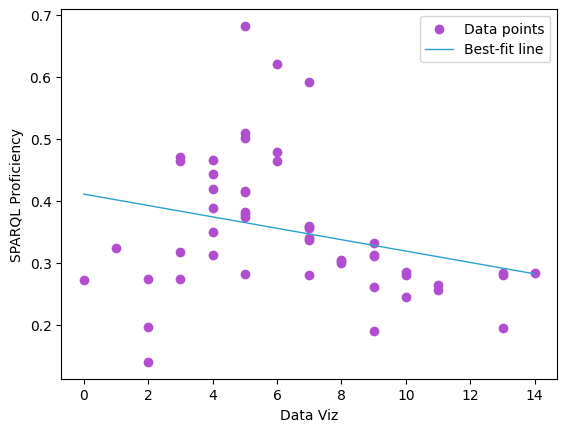

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array(df_merged['num_data_viz'])
y = np.array(df_merged['sparql_proficiency'])
 
# Compute best-fit line (linear regression)
m, b = np.polyfit(x, y, 1)  # 1st-degree polynomial (y = mx + b)
 
# Create scatter plot
plt.scatter(x, y, color='#b14ecf', label="Data points")
 
# Plot best-fit line
x_sorted = np.sort(x)
plt.plot(x_sorted, m*x_sorted + b, color='#29a1cf', linewidth=1, label="Best-fit line")
 
# Labels and title
plt.xlabel("Data Viz")
plt.ylabel("SPARQL Proficiency")
plt.legend()
plt.show()

In [8]:
# Pearson
correlation = df_merged['num_data_viz'].corr(df_merged['sparql_proficiency'])
print("Pearson correlation coefficient:", correlation)

# Spearman 
spearman_corr = df_merged['num_data_viz'].corr(df_merged['sparql_proficiency'], method='spearman')
print("Spearman correlation coefficient:", spearman_corr)

#Previous:
# Pearson correlation coefficient: -0.1461511935830751
# Spearman correlation coefficient: -0.2426243960001764

Pearson correlation coefficient: -0.2751923523862141
Spearman correlation coefficient: -0.3221414639219944
